<a href="https://colab.research.google.com/github/ArthurMro/rafiki/blob/master/Arthur_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# case: Arthur Moreau

Roadmap:
1. Question def
2. acquire data
3. cleanse data
4. eda + data transf
5. model (not necessary here), replaced by a testing phase
6. reporting/visualizing

# 1. Question definition
## 1.1 text goals
- unique film
- broad public
- project not done before, she is an artist
- Actors super important
- Well-known actors as head role, but in atypic roles (=playing in a genre that they have (almost) never played in)
- Great chance to earn lot a money

## 1.2 Numeric goals
- Top genre influencing revenue
- Actors can't play in usual genre
- Broad public

## 1.3 Question
1. Which actors do I need to have a very successful movie, knowing that the actor can't play in a genre they are used to?
2. What other factors are influencing revenue?

#2. Acquire the data


In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving actor_dataset.csv to actor_dataset.csv
Saving movie_dataset.csv to movie_dataset.csv


In [ ]:
actor = pd.read_csv(io.BytesIO(uploaded['actor_dataset.csv']), delimiter=';')
movies = pd.read_csv(io.BytesIO(uploaded['movie_dataset.csv']), delimiter=';')

In [ ]:
actor.head()


,movie_title,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
0,Avatar,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez,Giovanni Ribisi,Joel David Moore,CCH Pounder,Wes Studi,Laz Alonso
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Keira Knightley,Chow Yun-fat,Bill Nighy,Geoffrey Rush,Jack Davenport,Kevin McNally,Tom Hollander,Naomie Harris
2,Spectre,Daniel Craig,Christoph Waltz,Ralph Fiennes,Monica Bellucci,Ben Whishaw,Naomie Harris,Dave Bautista,Andrew Scott,Rory Kinnear,Jesper Christensen
3,The Dark Knight Rises,Christian Bale,Michael Caine,Gary Oldman,Anne Hathaway,Tom Hardy,Marion Cotillard,Joseph Gordon-Levitt,Morgan Freeman,Cillian Murphy,Juno Temple
4,John Carter,Taylor Kitsch,Lynn Collins,Samantha Morton,Willem Dafoe,Thomas Haden Church,Mark Strong,Dominic West,James Purefoy,Bryan Cranston,Polly Walker


In [ ]:
movies.head()

,movie_title,director_name,summary,genres,release_date,duration,budget,opening_weekend_usa,gross_usa,gross_worldwide,imdb_score,num_critic_for_reviews,num_voted_users,metascore,oscar_wins,oscar_nominees
0,Avatar,James Cameron,A paraplegic marine dispatched to the moon Pan...,Action | Adventure | Fantasy | Sci-Fi,2009-12-17,162,237000000.0,77025481.0,760507625.0,2.787965e+09,7.8,727.0,1038709.0,83.0,3,9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,"Captain Barbossa, Will Turner and Elizabeth Sw...",Action | Adventure | Fantasy,2007-05-23,169,300000000.0,139802190.0,309420425.0,9.634204e+08,7.1,322.0,554187.0,50.0,0,2
2,Spectre,Sam Mendes,A cryptic message from 007's past sends him pi...,Action | Adventure | Thriller,2015-10-29,148,245000000.0,70403148.0,200074175.0,8.806742e+08,6.8,627.0,350849.0,60.0,0,0
3,The Dark Knight Rises,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Action | Thriller,2012-07-20,164,250000000.0,160887295.0,448139099.0,1.084939e+09,8.4,834.0,1378531.0,78.0,0,0
4,John Carter,Andrew Stanton,"Transported to Barsoom, a Civil War vet discov...",Action | Adventure | Sci-Fi,2012-03-08,132,250000000.0,30180188.0,73078100.0,2.841391e+08,6.6,477.0,238554.0,51.0,0,0


#3. Analyze and Cleanse data
Let's verify that the data is complete



## 3.1 actor dataset

In [ ]:
actor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_title  3542 non-null   object
 1   actor_1      3468 non-null   object
 2   actor_2      3466 non-null   object
 3   actor_3      3460 non-null   object
 4   actor_4      3449 non-null   object
 5   actor_5      3422 non-null   object
 6   actor_6      3372 non-null   object
 7   actor_7      3326 non-null   object
 8   actor_8      3253 non-null   object
 9   actor_9      3161 non-null   object
 10  actor_10     3051 non-null   object
dtypes: object(11)
memory usage: 304.5+ KB


/!\ we have 3542 movies, and it seems that 74 have no actors! let's dive into that.

In [ ]:
actor.columns

Index(['movie_title', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'actor_5',
       'actor_6', 'actor_7', 'actor_8', 'actor_9', 'actor_10'],
      dtype='object')

In [ ]:
actor[actor['actor_1'].isnull()]

,movie_title,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10
21,Robin Hood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,How the Grinch Stole Christmas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,Mr. & Mrs. Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,Charlie's Angels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,Mulan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3472,Poultrygeist: Night of the Chicken Dead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3481,The Beyond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3503,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3535,Slacker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that there is a mix: some movie don't have actors and might be removed. Other such as Robin Hood and Mulan, may be animated movie.

In [ ]:
print(movies[movies['movie_title'] == "Mulan"])
print(movies[movies['movie_title'] == "Robin Hood"])

    movie_title director_name  ... oscar_wins oscar_nominees
341       Mulan     Niki Caro  ...          0              0

[1 rows x 16 columns]
   movie_title  director_name  ... oscar_wins oscar_nominees
21  Robin Hood  Otto Bathurst  ...          0              0

[1 rows x 16 columns]


Seeing the director's name, we can safely conclude that we are not talking about the animated movie from Disney, but well from the more recent realistic film. This being concluded, it's safe to assume that the data about the 74 movies without actors is a mistake.

As 74 is only 2.1% of the total amount of movie, we can exclude these movies.

In [ ]:
actor.dropna(subset = ['actor_1'], axis=0, inplace=True)

In [ ]:
actor.shape

(3468, 11)

By having, for the dataset actor, a shape of (3468, 11), we can safely conclude that the mistaken lines were removed.

##3.2 film dataset

### 3.2.1 removing useless features

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_title             3542 non-null   object 
 1   director_name           3542 non-null   object 
 2   summary                 3542 non-null   object 
 3   genres                  3542 non-null   object 
 4   release_date            3521 non-null   object 
 5   duration                3542 non-null   int64  
 6   budget                  3392 non-null   float64
 7   opening_weekend_usa     3245 non-null   float64
 8   gross_usa               3471 non-null   float64
 9   gross_worldwide         2622 non-null   float64
 10  imdb_score              3524 non-null   float64
 11  num_critic_for_reviews  3523 non-null   float64
 12  num_voted_users         3524 non-null   float64
 13  metascore               3294 non-null   float64
 14  oscar_wins              3542 non-null   

Numerous columns are incomplete in the dataset. But our analysis doesn't need all the data available. To answer the question, we will keep, as necessary metrics:
- movie_title
- genres
- gross_usa

Nice-to-have metrics to precict success:
- director_name
- duration
- summary
- budget
- imdb_score
- metascore

We will remove:
- release_data: not relevant for our questions
- opening_weekend_usa: a better proxy is gross usa
- gross_worldwide: 26% of the data is missing. We will thus take gross_usa as a proxy for the commercial success
- num_critic_for_reviews: we will take imdb_score for proxy
- num_voted_users: we will take imdb_score for proxy
- metascore: correlated with Imdb score, so can be removed
- oscar_wins: gross_usa is a better proxy
- oscar_nominee: gross_usa is a better proxy

Now very important: the goal is to maximize the international revenue, as Annet Raket is probably caring about our friends and family, in the Netherlands, liking the movie too. So we will see is there is a correlation between the gross_usa and gross_worlwide. If the corration is above 90%, the gross_usa will be used as a proxy.

As there is a 92% correlation between the two score, we will keep gross_usa as proxy. Additionall, regarding the metascore and the imdb score, the two have a good correlation. But because we have more data about the imdb score, we will keep this only one as a proxy.

In [ ]:
movie.drop(['release_date', 'opening_weekend_usa','gross_worldwide', 'num_critic_for_reviews',
       'num_voted_users', 'metascore', 'oscar_wins', 'oscar_nominees'], axis=1, inplace=True)

###3.2.2 Removing missing data

From the movie dataset, we will remove the row having no gross_usa score. We will thus loose 2.01% of the data.

In [ ]:
movies.dropna(subset = ['gross_usa'], axis=0, inplace=True)
movies.shape

(3471, 16)

###3.2.3 Outlier analysis

We will analyze the 4 numerical factors (duration, budget, gross_usa and imdb_score) regarding outliers and basic stats in order to verify that the data represents the reality.

- duration: some movie have a 0 min lenght. This is anormal and necessites a deep dive. 
- The rest seems to have normal range.

In [ ]:
movie.describe()

,duration,budget,opening_weekend_usa,gross_usa,gross_worldwide,imdb_score,num_critic_for_reviews,num_voted_users,metascore,oscar_wins,oscar_nominees
count,3471.000000,3.383000e+03,3.244000e+03,3.471000e+03,2.604000e+03,3471.000000,3471.000000,3.471000e+03,3261.000000,3471.000000,3471.000000
mean,108.802939,3.908449e+07,1.409074e+07,5.260578e+07,1.410468e+08,6.477269,169.374532,1.254947e+05,54.588163,0.152694,0.512532
std,20.842356,4.237182e+07,2.081403e+07,6.961537e+07,1.989654e+08,1.024140,127.322080,1.860699e+05,18.230005,0.861450,1.826258
min,0.000000,2.180000e+02,8.600000e+01,2.100000e+01,1.200000e+03,1.600000,3.000000,2.890000e+02,6.000000,0.000000,0.000000
25%,95.000000,1.055000e+07,4.983280e+05,8.583030e+06,2.553382e+07,5.900000,77.000000,2.280100e+04,41.000000,0.000000,0.000000
50%,106.000000,2.500000e+07,8.007741e+06,3.010272e+07,7.708805e+07,6.600000,137.000000,6.367600e+04,54.000000,0.000000,0.000000
75%,119.000000,5.200000e+07,1.810928e+07,6.727778e+07,1.704082e+08,7.200000,227.000000,1.491060e+05,68.000000,0.000000,0.000000
max,244.000000,3.000000e+08,2.088063e+08,7.605076e+08,2.787965e+09,9.300000,834.000000,2.084625e+06,100.000000,11.000000,15.000000


In [ ]:
print(movie[movie['duration']==0])

                       movie_title  ... oscar_nominees
807                       Instinct  ...              0
1051                     Pinocchio  ...              2
1202             Raise the Titanic  ...              0
1634               The Right Stuff  ...              8
1893                       Firefox  ...              0
2005  The Greatest Story Ever Told  ...              5
2200                          Roar  ...              0
2513                      WarGames  ...              3
2721                        Sphinx  ...              0
2997              Chariots of Fire  ...              7
3162            Annie Get Your Gun  ...              0
3293                    Witchboard  ...              0
3418             On the Waterfront  ...             12
3470                 Bloody Sunday  ...              0

[14 rows x 16 columns]


14 movies have 0 in duration. Considering that it is a mistake, we will replace the duration of this movie by the average duration.

In [ ]:
movie = movie.fillna(movie['duration'].mean())

#4. EDA & data transformation

## 4.1 Data merging

We will now analyze whether the data kept make sense. We will use vizualization to get insights

In [ ]:
print(actor.shape)
print(movie.shape)

df = pd.merge(actor, movie, on='movie_title', how='inner')
print(df.shape)

(3468, 11)
(3471, 3)
(3426, 13)


Our latest dataset includes 3426 movies with complete information, or 96.7% of the original movie dataset. The final sample is big enough in absolute size to keep working with it.

##4.2 Data correlation: which factor influence revenue

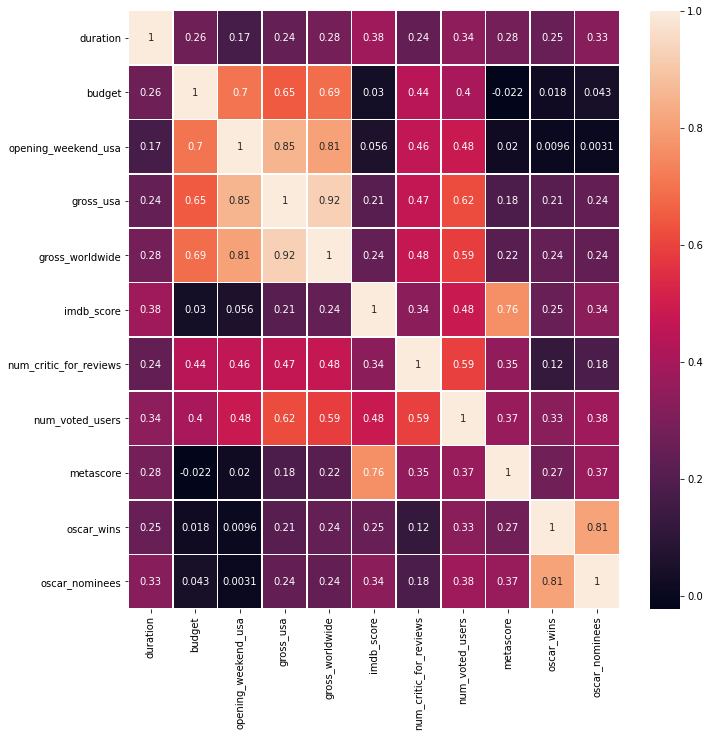

In [ ]:
df_corr = movie.corr()

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,
           annot=True, linewidths=.5, ax=ax)

This analysis allow us to answer the question 2: which factors influence the revenue. We see that budget and num_voted_users have the highest positive correlation.

##4.3 Most profitable genre



First piece of code: which genre is the most related to revenue.

In [ ]:
genre_list = df['genres'].str.split('|')
genre = set()
for i in range(len(genre_list)):
    genre |= set(genre_list[i])
print(genre)

{'Documentary', ' Fantasy', ' Action ', ' Comedy', 'Action', ' Horror ', 'Comedy', 'Fantasy ', ' Comedy ', 'Crime ', ' Sport ', 'Comedy ', 'Western', ' Sport', ' Crime ', 'Family ', ' Biography', ' Sci-Fi', ' History', ' Drama', 'Biography ', ' Drama ', ' Romance ', 'Horror ', ' Crime', ' Biography ', ' War', ' Musical ', ' Sci-Fi ', 'Animation ', 'Drama ', ' Musical', 'Action ', ' Fantasy ', ' Music', 'Documentary ', ' Action', ' Documentary', 'Horror', ' Romance', ' Horror', 'Sci-Fi ', 'Mystery ', ' Mystery', ' Music ', 'Adventure', ' Family ', ' Thriller', ' Thriller ', 'Thriller', ' History ', ' Adventure', 'Musical ', 'Romance ', ' Adventure ', ' War ', 'Thriller ', ' Family', ' Film-Noir ', ' Western', ' Mystery ', 'Drama', 'Adventure '}


In [ ]:
genre_df = pd.DataFrame(genre_list.values.tolist(), index=df['movie_title']).replace({None:np.nan})
print(genre_df.head())

                                                0            1  ...    6    7
movie_title                                                     ...          
Avatar                                    Action    Adventure   ...  NaN  NaN
Pirates of the Caribbean: At World's End  Action    Adventure   ...  NaN  NaN
Spectre                                   Action    Adventure   ...  NaN  NaN
The Dark Knight Rises                     Action      Thriller  ...  NaN  NaN
John Carter                               Action    Adventure   ...  NaN  NaN

[5 rows x 8 columns]


Let's make dummy out of it

In [ ]:
genre_dummies = pd.get_dummies(genre_df.stack()).groupby(level=0).max()

In [ ]:
genre_dummies.head()

,Action,Action,Adventure,Adventure,Biography,Biography,Comedy,Comedy,Crime,Crime,Documentary,Drama,Drama,Family,Family,Fantasy,Fantasy,Film-Noir,History,History,Horror,Horror,Music,Music,Musical,Musical,Mystery,Mystery,Romance,Romance,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Action,Action,Adventure,Adventure,Animation,Biography,Comedy,Comedy,Crime,Documentary,Documentary,Drama,Drama,Family,Fantasy,Horror,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,Thriller,Western
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10th & Wolf,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12 Rounds,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We wil then merge to have a table with both gender dummies and revenue.

In [ ]:
df_final = pd.merge(genre_dummies,df, on='movie_title')
df_final.head()

,movie_title,Action,Action,Adventure,Adventure,Biography,Biography,Comedy,Comedy,Crime,Crime,Documentary,Drama,Drama,Family,Family,Fantasy,Fantasy,Film-Noir,History,History,Horror,Horror,Music,Music,Musical,Musical,Mystery,Mystery,Romance,Romance,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Action,Action,Adventure,Adventure,Animation,Biography,Comedy,Comedy,Crime,Documentary,Documentary,Drama,Drama,Family,Fantasy,Horror,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,Thriller,Western,actor_1,actor_2,actor_3,actor_4,actor_5,actor_6,actor_7,actor_8,actor_9,actor_10,genres,gross_usa
0,10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Mary Elizabeth Winstead,John Goodman,John Gallagher Jr.,Bradley Cooper,Douglas M. Griffin,Cindy Hogan,Suzanne Cryer,Maya Erskine,Mat Vairo,Ryan Martin Dwyer,Drama | Horror | Mystery | Sci-Fi | Thriller,71897215.0
1,10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Heath Ledger,Julia Stiles,Joseph Gordon-Levitt,Larisa Oleynik,David Krumholtz,Andrew Keegan,Susan May Pratt,Gabrielle Union,Larry Miller,Daryl Mitchell,Comedy | Drama | Romance,38176108.0
2,102 Dalmatians,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Glenn Close,Ioan Gruffudd,Alice Evans,Tim McInnerny,NaN,NaN,NaN,NaN,NaN,NaN,Adventure | Comedy | Family,66957026.0
3,10th & Wolf,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,James Marsden,Brian Dennehy,Leo Rossi,Dennis Hopper,Giovanni Ribisi,Tony Luke Jr.,John Capodice,Billy Gallo,Ken Garito,Dash Mihok,Crime | Drama | Thriller,53481.0
4,12 Rounds,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,John Cena,Aidan Gillen,Ashley Scott,Steve Harris,Brian J. White,Gonzalo Menendez,Taylor Cole,Kyle Russell Clements,Peter 'Navy' Tuiasosopo,Travis Davis,Action | Crime | Thriller,12232937.0


In [ ]:
df_final.corr()

,Action,Action,Adventure,Adventure,Biography,Biography,Comedy,Comedy,Crime,Crime,Documentary,Drama,Drama,Family,Family,Fantasy,Fantasy,Film-Noir,History,History,Horror,Horror,Music,Music,Musical,Musical,Mystery,Mystery,Romance,Romance,Sci-Fi,Sci-Fi,Sport,Sport,Thriller,Thriller,War,War,Western,Action,Action,Adventure,Adventure,Animation,Biography,Comedy,Comedy,Crime,Documentary,Documentary,Drama,Drama,Family,Fantasy,Horror,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,Thriller,Western,gross_usa
Action,1.000000,-0.001785,-0.000877,-0.007113,-0.000413,-0.001736,-0.001857,0.045528,-0.002591,-0.005800,-0.000413,-0.004866,-0.010353,-0.002659,-0.005447,-0.004082,-0.004856,-0.000292,-0.002037,-0.002807,-0.001834,-0.003868,-0.002521,-0.002539,-0.001971,-0.001949,-0.002395,-0.005147,-0.008182,-0.003868,-0.004866,-0.004333,-0.003434,-0.000584,-0.010947,-0.001736,-0.003501,-0.000773,-0.002142,-0.000413,-0.009739,-0.000292,-0.004595,-0.003988,-0.004288,-0.003255,-0.009408,-0.004519,-0.000716,-0.001579,-0.003283,-0.006872,0.446952,-0.001133,-0.001579,-0.003255,-0.000292,-0.001170,-0.000506,-0.000506,-0.000292,-0.000292,-0.000506,-0.010015
Action,-0.001785,1.000000,-0.005362,0.203248,-0.002525,-0.010615,0.041222,0.149638,-0.015844,-0.026192,-0.002525,-0.029756,-0.050566,0.076676,0.191162,0.112478,0.056226,-0.001785,-0.012455,-0.017162,-0.011212,-0.023653,-0.015417,-0.015525,-0.012054,-0.011918,0.005901,-0.031474,-0.050032,-0.010538,0.141775,-0.002792,-0.020999,-0.003572,-0.054508,-0.010615,-0.021406,-0.004728,-0.013098,-0.002525,-0.059551,-0.001785,-0.028095,0.409391,-0.026223,-0.019907,-0.050847,-0.027636,-0.004377,0.051996,-0.020078,-0.042023,-0.003995,-0.006929,-0.009654,-0.019907,-0.001785,-0.007157,-0.003093,-0.003093,-0.001785,-0.001785,-0.003093,0.084946
Adventure,-0.000877,-0.005362,1.000000,-0.021364,-0.001240,-0.005214,-0.005578,-0.019262,-0.007782,-0.017422,-0.001240,-0.014615,-0.018229,-0.007986,-0.016359,-0.012262,-0.014584,-0.000877,-0.006118,-0.008430,-0.005507,-0.011618,-0.007573,-0.007625,-0.005921,-0.005854,-0.007193,-0.015459,-0.024574,-0.011618,-0.014615,-0.013014,-0.010314,-0.001755,-0.032880,0.051494,-0.010514,-0.002322,-0.006433,-0.001240,0.076793,-0.000877,-0.013800,-0.011979,-0.012880,-0.009778,-0.028257,-0.013574,-0.002150,-0.004742,-0.009862,-0.020641,0.147414,-0.003403,-0.004742,-0.009778,-0.000877,-0.003515,-0.001519,-0.001519,-0.000877,-0.000877,-0.001519,0.079067
Adventure,-0.007113,0.203248,-0.021364,1.000000,-0.010061,0.014978,0.023682,0.276398,-0.029819,-0.057525,-0.010061,-0.106054,-0.103725,0.076006,0.276718,0.220860,0.141389,-0.007113,-0.021624,-0.006648,-0.036914,-0.036925,-0.044332,-0.033555,0.024234,-0.003643,-0.022431,-0.080708,-0.133854,-0.044566,0.271847,0.129230,-0.066624,0.009859,0.023091,0.006796,-0.014150,-0.000617,0.027813,-0.010061,0.451193,-0.007113,-0.111932,0.438045,-0.104472,-0.079309,-0.229202,-0.110102,-0.017436,-0.029482,-0.079991,-0.165043,-0.015914,-0.027605,-0.038462,-0.079309,-0.007113,-0.028515,-0.012324,-0.012324,-0.007113,-0.007113,-0.012324,0.328313
Biography,-0.000413,-0.002525,-0.001240,-0.010061,1.000000,-0.002455,-0.002627,-0.009071,-0.003665,-0.008204,-0.000584,-0.006883,-0.014644,-0.003761,-0.007704,-0.005774,-0.006868,-0.000413,-0.002881,-0.003970,-0.002593,-0.005471,-0.003566,-0.003591,-0.002788,-0.002757,-0.003387,-0.007280,-0.011573,-0.005471,-0.006883,-0.006129,-0.004857,-0.000826,-0.015484,-0.002455,-0.004951,-0.001094,-0.003030,-0.000584,-0.013774,-0.000413,-0.006499,-0.005641,-0.006065,-0.004605,-0.013307,-0.006392,-0.001012,0.261575,-0.004644,-0.009720,-0.000924,-0.001603,-0.002233,-0.004605,-0.000413,-0.001656,-0.000715,-0.000715,-0.000413,-0.000413,-0.000715,-0.017648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi,-0.000506,-0.003093,-0.001519,

Et Voila! We can see from the table above that the gender which has the highest correlation with revenue is the adventure genre! Our frist question is answered.

##4.4 Actor and genre

We have now to tackle the second part of the first questions: which actors would play in which genre. We will proceed in multiple steps:
1. Giving a score to actor fame
2. Make a list of all unique actors and create a dictionnary
3. Initiate the dictionnary
4. poplulate the dictonnary with movie and score
5. Create a dictonnary of the directors
6. Take unique genre per director
7. Find the genre the actor played for
8. Find unique genre per actor
9. Remove NaN actor
10. Find the best actor per genre
11. Build a dataframe
12. Test the results

###4.4.1 Get the scoring for casting in a movie (dependent on the position, 1st - 10, 2nd - 5, 3rd - 2, etc.)

In [ ]:
cast_position_scoring = [round(10*2**(-i)) for i in range(10)]
cast_position_scoring

[10, 5, 2, 1, 1, 0, 0, 0, 0, 0]

###4.4.2 Get all the actors and form a dictionary


In [ ]:

Actors = {}
unique_actors = []
for i in range(1,11,1):
    unique_actors_ith_col = actor.iloc[:,i]
    unique_actors += list(unique_actors_ith_col)

unique_actors = set(unique_actors)

###4.4.3 Initiate the values for each actor

In [ ]:
for act in unique_actors:
    Actors[act] = {}
    Actors[act]["genres_played"] = []
    Actors[act]["genres_could_play"] = []
    Actors[act]["movies"] = []
    Actors[act]["Score"] = 0
    

###4.4.4.Populate the dictionary with the movies played and score

In [ ]:
for h in range(actor.shape[0]):
    movie_title = actor.iloc[h, 0]
    for a in range(1,11,1):
        actor_name = actor.iloc[h, a]
        Actors[actor_name]["movies"].append(movie_title)
        Actors[actor_name]["Score"] += cast_position_scoring[a-1]

###4.4.5 Get the directors

In [ ]:
Director = {}

for movie in movies["movie_title"]:
    current_row = movies[movies["movie_title"] == movie]
    current_movie = movie
    director = current_row["director_name"].iloc[0]
    genre_list = current_row["genres"].iloc[0].split(" | ")
    
    if director not in Director:
        Director[director] = genre_list
    else:
        Director[director] += genre_list

###4.4.6 Remove duplicate genre

In [ ]:
for director in Director:
    Director[director] = set(Director[director])

###4.4.7. Find out the genres of the movies the actors starred at


In [ ]:
for movie in movies["movie_title"]:
    current_row = movies[movies["movie_title"] == movie]
    current_movie = movie
    genre_list = current_row["genres"].iloc[0].split(" | ")
    
    actor_list = actor[actor["movie_title"] == current_movie].iloc[:,1:].values[0]
    for a in actor_list:
        Actors[a]["genres_played"] += genre_list

###4.4.8. Get rid if the duplicate values by changing the list to the set

In [ ]:
for ac in Actors:
    Actors[ac]["genres_played"] = set(Actors[ac]["genres_played"])

### 4.4.9 Some movies were in genres directed by some director but not played by the actor who casted in one of his/her movies.


In [ ]:
for title in movies["movie_title"]:
    cast = actor[actor["movie_title"] == title].iloc[:, 1:].values[0]
    director = movies[movies["movie_title"] == title].iloc[:,1].values[0]
    director_genres = Director[director]
    for c in cast:
        act_genres = Actors[c]["genres_played"]
        could_play = director_genres.difference(act_genres)        
        if Actors[c]["genres_could_play"] == []:
            Actors[c]["genres_could_play"] = could_play
        else:
            Actors[c]["genres_could_play"] = Actors[c]["genres_could_play"].difference(could_play)

###4.4.10 remove Nan

In [ ]:
del Actors[np.nan]

###4.4.11 Find best actor for genre

In [ ]:
Non_null_actors = {"Actor": [], "Score": [], "Genres": []}

for act in Actors:
    gcp = Actors[act]["genres_could_play"]
    if gcp == set([]):
        continue
    else:
        name = act
        score = Actors[act]["Score"]
        genres = list(Actors[act]["genres_could_play"])

        Non_null_actors["Actor"].append(name)
        Non_null_actors["Score"].append(score)
        Non_null_actors["Genres"].append(genres)

###4.4.12 present the result as a DataFrame

In [ ]:
Non_null_actors = pd.DataFrame(Non_null_actors)
Non_null_actors

,Actor,Score,Genres
0,Dan Richards,0,"[Comedy, Drama]"
1,Rhys Darby,2,"[Action, Sport, Adventure, Sci-Fi, Drama]"
2,Thomas Ian Nicholas,9,"[Family, Sport]"
3,Billy Boyd,3,[Sci-Fi]
4,Seth Adkins,0,"[Action, Adventure, Sci-Fi]"
...,...,...,...
7521,Gila Almagor,0,"[Biography, Animation, Fantasy, Mystery, Actio..."
7522,Essie Davis,4,[Musical]
7523,Francesco De Vito,0,[]
7524,Lee Grant,0,[Biography]


#5. Testing the result

Let's test the result for the genre adventure. It will give us our final answer.

In [ ]:
pick_genre = "Adventure"

# Filter the results based on the picked genre
genre_filter = [(pick_genre in Non_null_actors["Genres"][k]) for k in range(Non_null_actors.shape[0])]

# Find out which actor would fit the best
Filtered_df = Non_null_actors.iloc[Non_null_actors.index[genre_filter],:].sort_values(by="Score", ascending=False)
Filtered_df.head(10)

,Actor,Score,Genres
2735,Zac Efron,87,[Adventure]
5863,Cher,30,"[Animation, Fantasy, Sport, Adventure, Family,..."
1078,Dane Cook,30,"[Animation, Fantasy, Adventure, Family, Action]"
7505,Dan Futterman,26,"[Fantasy, Sport, Mystery, Adventure, Family, A..."
3334,Dave Chappelle,25,"[Horror, Adventure]"
5860,Julianne Hough,23,"[Family, Action, Fantasy, Adventure]"
6877,Patrick Swayze,23,[Adventure]
700,Janet Jackson,22,"[Sport, Adventure]"
6722,Juliette Binoche,21,[Adventure]
5952,Armin Mueller-Stahl,17,"[Adventure, History, Sport]"
